Dataset: ecommerceDataset.csv
- The dataset has the following features:
- Data Set Characteristics: Multivariate
- Number of Instances: 50424
- Number of classes: 4

Objective:
To implement the techniques learned as a part of the course.


Learning Outcomes:
    
- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model

In [4]:
import re, string, unicodedata
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings('ignore')

In [5]:
# To load the data

df = pd.read_csv('ecommerceDataset.csv')

In [6]:
# To check the first 5 rows in the data

df.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [7]:
# To see the dimension of the data

df.shape

(50424, 2)

In [8]:
# To see the structure of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50424 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [9]:
# To check the missing value

df.isna().sum()

Label    0
Text     1
dtype: int64

In [10]:
# To check duplicate

df.duplicated().sum()

22622

In [11]:
# To check the columns in the dataset

df.columns

Index(['Label', 'Text'], dtype='object')

In [12]:
# To see the unique values in the Label column

df['Label'].unique()

array(['Household', 'Clothing & Accessories', 'Electronics', 'Books'],
      dtype=object)

In [13]:
df['Text'].count()

50423

In [14]:
# To see each value in label

df[df['Label']=='Books']

,Label,Text
22,Books,Attitude Is Everything: Change Your Attitude ....
23,Books,GATE 2019: Computer Science and IT Engineering...
32,Books,Easy Learning Spanish Grammar & Practice
35,Books,Tribal India Tribal India Nadeem Hasnain Publi...
36,Books,Negotiation Genius: How to Overcome Obstacles ...
...,...,...
50400,Books,Sita: Warrior of Mithila (Ram Chandra) Review ...
50406,Books,Sail
50412,Books,Textbook of Oral & Maxillofacial Surgery
50419,Books,"The Circadian Code: Lose weight, supercharge y..."


In [15]:
# To see each value in label

df[df['Label']=='Clothing & Accessories']

,Label,Text
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
25,Clothing & Accessories,Wrangler Men's Checkered Slim Fit Casual Shirt...
31,Clothing & Accessories,Cozami Casual Checkered Full Sleeves Shirts fo...
33,Clothing & Accessories,AREO Yoga Pant
34,Clothing & Accessories,Skudgear Jumbo Pack of 10 Cute Kids Baby Girls...
...,...,...
50408,Clothing & Accessories,Stole For Women - Grid Hijab - Fabric 100% Pur...
50410,Clothing & Accessories,Royal Kurta Men's Cotton Kurta Pyjama This pro...
50417,Clothing & Accessories,Vivid Bharti Men's Black Grey Fleece Tracksuit...
50420,Clothing & Accessories,LACE AND ME Grip Wire No Rolling Down Tummy Tu...


In [16]:
# To see each value in label

df[df['Label']=='Electronics']

,Label,Text
7,Electronics,Sony Alpha A6000L 24.3MP Digital SLR Camera (B...
8,Electronics,xcluma Antenna for GSM FCT Device GSM FCT Cabl...
11,Electronics,WD My Passport 3TB Portable External Hard Driv...
12,Electronics,D-Link DCS-P6000LH Mini HD Wi-Fi Camera Works ...
17,Electronics,"TopMate C5 12-15.6 inch Gaming Laptop Cooler, ..."
...,...,...
50393,Electronics,Seagate 1TB Backup Plus Slim (Black) USB 3.0 E...
50395,Electronics,TP-LINK 2.4GHz 150 Mbps High Power Outdoor Wir...
50397,Electronics,MSI GF63 Intel Core i5 8th Gen 15.6-inch Gamin...
50399,Electronics,Godox Ving V 860 II TTL Li-Ion Flash Kit for C...


In [17]:
# To see each value in label

#df[df['Label']=='Household'].value_counts()

In [18]:
#df.iloc[df[df['Label']=='Electronics'].idxmax()]
  
    # To see value in Label
    
df.query("Label == 'Household'")   # using query function

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...
5,Household,"SYGA Electric Knife Sharpener, Multi-Functiona..."
...,...,...
50414,Household,Urban Ladder Eddings Study-Office Desk (Natura...
50415,Household,FOCUS JANUARY 2019 Focus is the current affair...
50416,Household,Munchkin Fold Bottle Drying Rack (Color May Va...
50418,Household,FABEYA Arabica Coffee Body Scrub and Polish - ...


In [19]:
df.query("Label == 'Household'").max()

Label                                            Household
Text     zhart Vernier Caliper Digital 150 mm/6-Inches ...
dtype: object

In [20]:
Label_household = list(df.query("Label == 'Household'")['Text'].str.split().map(lambda x: len(x)))

In [21]:
df.dropna(inplace=True)

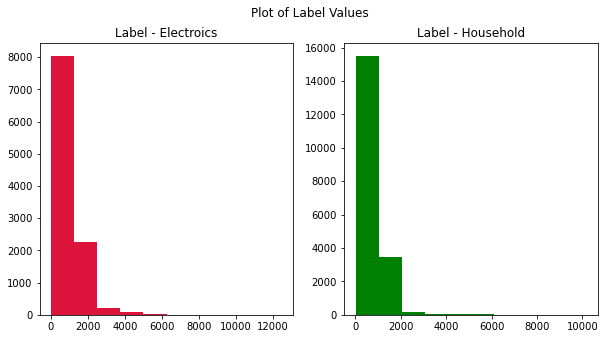

In [22]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

label_electronics_len = df[df['Label']=='Electronics']['Text'].str.len()
ax1.hist(label_electronics_len, color = 'crimson');
ax1.set_title('Label - Electroics')

label_household_len = df[df['Label']=='Household']['Text'].str.len()
ax2.hist(label_household_len, color='green');
ax2.set_title('Label - Household')

# label_clothing_len = df[df['Label']=='Clothing & Accessories']['Text'].str.len()
# ax3.hist(label_clothing_len, color = 'purple');
# ax3.set_title('Label - Clothing & Accessories')

# label_books_len = df.query("Label =='Books'")['Text'].str.len()
# ax4.hist(label_clothing_len);
# ax4.set_title('Label - Books')

fig.suptitle('Plot of Label Values');

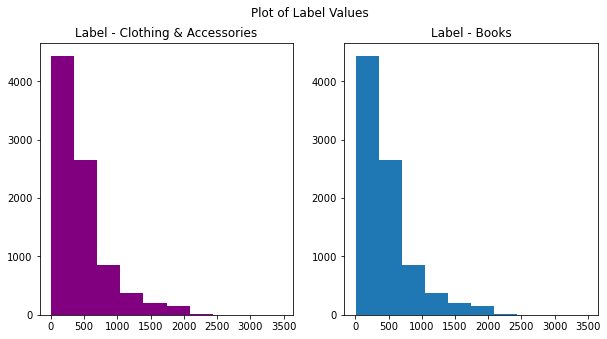

In [23]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10,5))

label_clothing_len = df[df['Label']=='Clothing & Accessories']['Text'].str.len()
ax3.hist(label_clothing_len, color = 'purple');
ax3.set_title('Label - Clothing & Accessories')

label_books_len = df.query("Label =='Books'")['Text'].str.len()
ax4.hist(label_clothing_len);
ax4.set_title('Label - Books')

fig.suptitle('Plot of Label Values');

In [24]:
Label_household_word = df.query("Label == 'Household'")['Text'].str.split().map(lambda x: len(x))
Label_electronics_word = df.query("Label == 'Electronics'")['Text'].str.split().map(lambda x: len(x))
Label_clothings_word = df.query("Label == 'Clothing & Accessories'")['Text'].str.split().map(lambda x: len(x))
Label_books_word = df.query("Label == 'Books'")['Text'].str.split().map(lambda x: len(x))


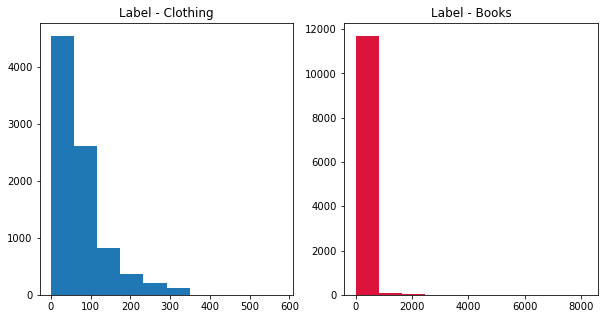

In [25]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10,5))

# label_clothing_len = df[df['Label']=='Clothing & Accessories']['Text'].str.len()
# ax3.hist(label_clothing_len, color = 'purple');
# ax3.set_title('Label - Clothing & Accessories')

Label_clothings_word = df.query("Label == 'Clothing & Accessories'")['Text'].str.split().map(lambda x: len(x))
ax3.hist(Label_clothings_word);
ax3.set_title('Label - Clothing');

Label_books_word = df.query("Label == 'Books'")['Text'].str.split().map(lambda x: len(x))
ax4.hist(Label_books_word, color='crimson');
ax4.set_title('Label - Books');

#fig.suptitle('Plot of Label Values');

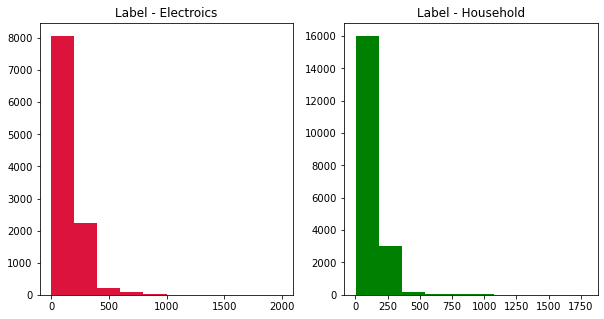

In [26]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

Label_household_word = df.query("Label == 'Household'")['Text'].str.split().map(lambda x: len(x))
ax1.hist(Label_electronics_word, color = 'crimson');
ax1.set_title('Label - Electroics')

abel_electronics_word = df.query("Label == 'Electronics'")['Text'].str.split().map(lambda x: len(x))
ax2.hist(Label_household_word, color='green');
ax2.set_title('Label - Household');

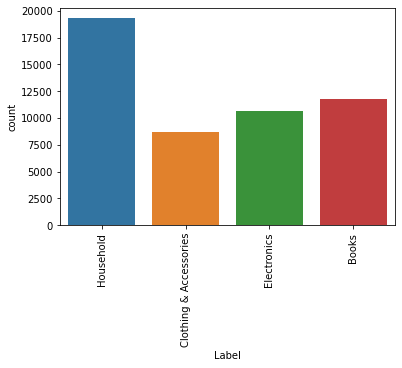

In [27]:
sns.countplot(data=df, x= 'Label');
plt.xticks(rotation=90);

In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

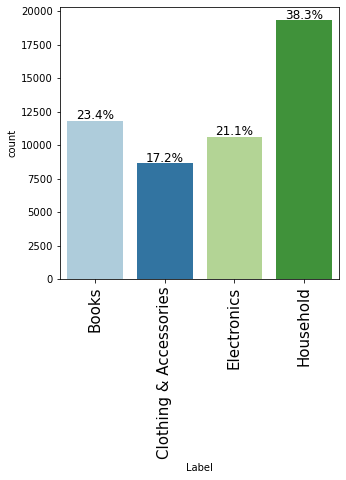

In [29]:
# Barplot of the family variable

labeled_barplot(data = df, feature = "Label", perc = True)

### Text Preprocessing

In [30]:
# pip install contractions

In [31]:
import contractions

In [32]:
# Removal of the http link using Regular Expression.
for i, row in df.iterrows():
    clean_df = re.sub(r"http\S+", "", df.at[i, 'Text'])
    df.at[i,'Text'] = clean_df
df.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [33]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in df.iterrows():
    Text = df.at[i, 'Text']
    clean_text = replace_contractions(Text)
    df.at[i,'Text'] = clean_text
df.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [34]:
df[df['Label'] =='Household'].Text                          # To check the Text in Household category

0        Styleys Wrought Iron Coat Rack Hanger Creative...
1        Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2        Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
4        Chef's Garage 2 Slot Edge Grip Kitchen Knife S...
5        SYGA Electric Knife Sharpener, Multi-Functiona...
                               ...                        
50414    Urban Ladder Eddings Study-Office Desk (Natura...
50415    FOCUS JANUARY 2019 Focus is the current affair...
50416    Munchkin Fold Bottle Drying Rack (Color May Va...
50418    FABEYA Arabica Coffee Body Scrub and Polish - ...
50423    3d Creations Aluminium Espresso Stove Percolat...
Name: Text, Length: 19312, dtype: object

In [35]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# To remove the digits using regular expression

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['Text'] = df['Text'].apply(lambda x: remove_numbers(x))
df.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,"Cuisinart CCO-BKN Deluxe Electric Can Opener, ..."
2,Household,Anchor Penta Amp -Way Switch (White) - Pack ...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, % Po..."
4,Household,Chef's Garage Slot Edge Grip Kitchen Knife Sh...


In [37]:
df['Text'] = df.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data
df.head()

,Label,Text
0,Household,"[Styleys, Wrought, Iron, Coat, Rack, Hanger, C..."
1,Household,"[Cuisinart, CCO-BKN, Deluxe, Electric, Can, Op..."
2,Household,"[Anchor, Penta, Amp, -Way, Switch, (, White, )..."
3,Clothing & Accessories,"[Proline, Men, 's, Track, Jacket, Proline, Wov..."
4,Household,"[Chef, 's, Garage, Slot, Edge, Grip, Kitchen, ..."


In [38]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [39]:
df['Text'] = df['Text'].apply(lambda x: remove_non_ascii(x))  #Apply the function to remove the non-ascii
df.head()

,Label,Text
0,Household,"[Styleys, Wrought, Iron, Coat, Rack, Hanger, C..."
1,Household,"[Cuisinart, CCO-BKN, Deluxe, Electric, Can, Op..."
2,Household,"[Anchor, Penta, Amp, -Way, Switch, (, White, )..."
3,Clothing & Accessories,"[Proline, Men, 's, Track, Jacket, Proline, Wov..."
4,Household,"[Chef, 's, Garage, Slot, Edge, Grip, Kitchen, ..."


In [40]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [41]:
df['Text'] = df['Text'].apply(lambda x: to_lowercase(x))  #Apply the function to convert to lower-case
df.head()

,Label,Text
0,Household,"[styleys, wrought, iron, coat, rack, hanger, c..."
1,Household,"[cuisinart, cco-bkn, deluxe, electric, can, op..."
2,Household,"[anchor, penta, amp, -way, switch, (, white, )..."
3,Clothing & Accessories,"[proline, men, 's, track, jacket, proline, wov..."
4,Household,"[chef, 's, garage, slot, edge, grip, kitchen, ..."


## Preprocessing - Punctuation Removal

In [42]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [43]:
df['Text'] = df['Text'].apply(lambda x: remove_punctuation(x))   #Apply the function to remove the punctuations
df.head()

,Label,Text
0,Household,"[styleys, wrought, iron, coat, rack, hanger, c..."
1,Household,"[cuisinart, ccobkn, deluxe, electric, can, ope..."
2,Household,"[anchor, penta, amp, way, switch, white, pack,..."
3,Clothing & Accessories,"[proline, men, s, track, jacket, proline, wove..."
4,Household,"[chef, s, garage, slot, edge, grip, kitchen, k..."


In [44]:
import nltk
nltk.download('stopwords')     #Downloading nltk corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
stopwords = stopwords.words('english')      # To create an instant of the stopwords

In [46]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [47]:
df['Text'] = df['Text'].apply(lambda x: remove_stopwords(x))  #Apply the function to remove the stopwords
df.head()

,Label,Text
0,Household,"[styleys, wrought, iron, coat, rack, hanger, c..."
1,Household,"[cuisinart, ccobkn, deluxe, electric, opener, ..."
2,Household,"[anchor, penta, amp, way, switch, white, pack,..."
3,Clothing & Accessories,"[proline, men, track, jacket, proline, woven, ..."
4,Household,"[chef, garage, slot, edge, grip, kitchen, knif..."


In [48]:
from nltk.stem.wordnet import WordNetLemmatizer        # Import Lemmatizer.

In [49]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [50]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words


#Apply the function

df['Text'] = df['Text'].apply(lambda x: lemmatize_list(x))
df.head()

,Label,Text
0,Household,"[styleys, wrought, iron, coat, rack, hanger, c..."
1,Household,"[cuisinart, ccobkn, deluxe, electric, opener, ..."
2,Household,"[anchor, penta, amp, way, switch, white, pack,..."
3,Clothing & Accessories,"[proline, men, track, jacket, proline, woven, ..."
4,Household,"[chef, garage, slot, edge, grip, kitchen, knif..."


### Normalisation - Aggregating Pre-Processing function into one

In [52]:
# Aggregating all functions

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#Apply the function to normalise after tokenization

df['Text'] = df.apply(lambda row: normalize(row['Text']), axis=1)
df.head()

,Label,Text
0,Household,styleys wrought iron coat rack hanger creative...
1,Household,cuisinart ccobkn deluxe electric opener black ...
2,Household,anchor penta amp way switch white pack anchor ...
3,Clothing & Accessories,proline men track jacket proline woven polyest...
4,Household,chef garage slot edge grip kitchen knife sharp...


####  The most common words

In [53]:
df['Text'] = df.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data
top = Counter([item for sublist in df['Text'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')    # The most common words in the Text

,Common_words,count
0,book,17826
1,x,16710
2,product,15139
3,size,14245
4,set,12652
5,make,12060
6,use,11972
7,time,11893
8,design,11710
9,one,11472


In [54]:
Label_Household = df[df['Label']=='Household']
Label_Electronics = df[df['Label']=='Electronics']
Label_Books = df[df['Label']=='Books']
Label_Clothing = df[df['Label']=='Clothing & Accessories']     # To select each category

In [55]:
# To print the total number of words in each category

print('Number of Words in Household is', Label_Household['Text'].count())
print('Number of Words in Electronics is', Label_Electronics['Text'].count())
print('Number of Words in Books is', Label_Books['Text'].count())
print('Number of Words in Clothing & Accessories is', Label_Clothing['Text'].count())

Number of Words in Household is 19312
Number of Words in Electronics is 10621
Number of Words in Books is 11820
Number of Words in Clothing & Accessories is 8670


In [56]:
#MosT common in Household category

top = Counter([item for sublist in Label_Household['Text'] for item in sublist])
freq_household = pd.DataFrame(top.most_common(20))
freq_household.columns = ['Common_words','count']
freq_household.style.background_gradient(cmap='Greens')

,Common_words,count
0,product,8346
1,home,8297
2,set,8186
3,x,7944
4,use,7346
5,easy,7103
6,color,6408
7,size,6399
8,design,5972
9,steel,5941


In [57]:
#MosT common in Electronics category

top = Counter([item for sublist in Label_Electronics['Text'] for item in sublist])
freq_electronics = pd.DataFrame(top.most_common(20))
freq_electronics.columns = ['Common_words','count']
freq_electronics.style.background_gradient(cmap='Greens')

,Common_words,count
0,x,7755
1,usb,6961
2,device,5849
3,camera,5336
4,mm,4940
5,black,4865
6,cable,4684
7,bluetooth,4557
8,speaker,4522
9,power,4363


In [58]:
#MosT common in Books category

top = Counter([item for sublist in Label_Books['Text'] for item in sublist])
freq_books = pd.DataFrame(top.most_common(20))
freq_books.columns = ['Common_words','count']
freq_books.style.background_gradient(cmap='Greens')

,Common_words,count
0,book,16623
1,author,10219
2,time,4879
3,new,4794
4,one,4629
5,life,4555
6,review,3996
7,world,3794
8,year,3735
9,student,3294


In [59]:
#MosT common words in clothing and accessories category

top = Counter([item for sublist in Label_Clothing['Text'] for item in sublist])
freq_clothing = pd.DataFrame(top.most_common(20))
freq_clothing.columns = ['Common_words','count']
freq_clothing.style.background_gradient(cmap='Greens')

,Common_words,count
0,woman,5692
1,cotton,5557
2,size,4450
3,men,4303
4,wear,3963
5,fit,3333
6,fabric,3193
7,made,2983
8,look,2959
9,set,2530


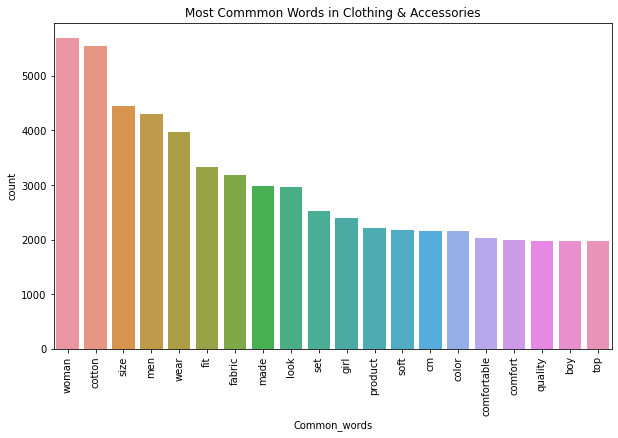

In [60]:
# Plot of top 20 words in Clothing & Accessories category

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_clothing, ax=ax)
plt.title("Most Commmon Words in Clothing & Accessories")
plt.xticks(rotation='vertical');

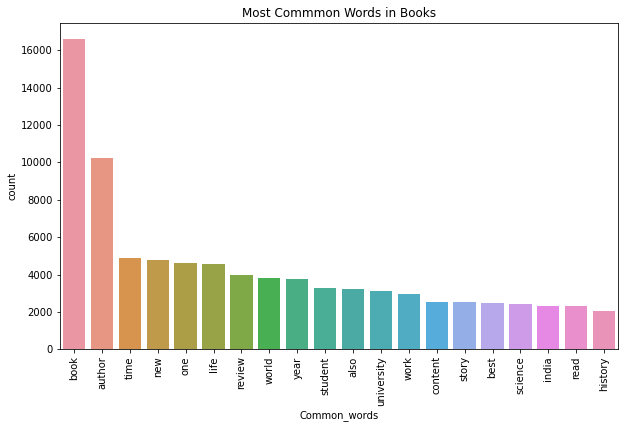

In [61]:
# Plot of top 20 words in Books category

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_books, ax=ax)
plt.title("Most Commmon Words in Books")
plt.xticks(rotation='vertical');

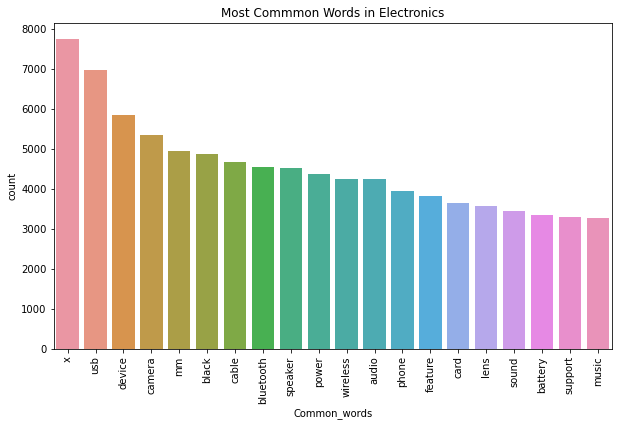

In [62]:
# Plot of top 20 words in Electronics category

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_electronics, ax=ax)
plt.title("Most Commmon Words in Electronics")
plt.xticks(rotation='vertical');

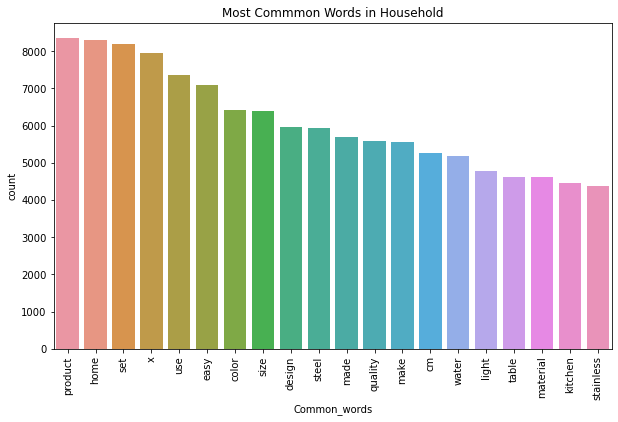

In [63]:
# Plot of top 20 words in Household category

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_household, ax=ax)
plt.title("Most Commmon Words in Household")
plt.xticks(rotation='vertical');

In [64]:
# Visualisation of Text in Clothing and Accessories category using wordcloud

import wordcloud
def show_wordcloud(Label_Clothing, title):
    text = ' '.join(Label_Clothing['Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

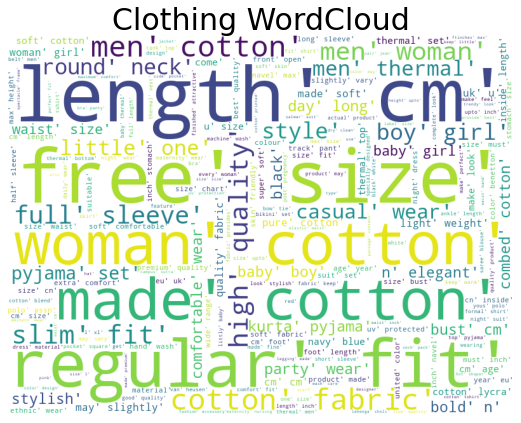

In [65]:
show_wordcloud(Label_Clothing, "Clothing WordCloud")

In [66]:
# Visualisation of Text in Electronics category using wordcloud

import wordcloud
def show_wordcloud(Label_Household, title):
    text = ' '.join(Label_Electronics['Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

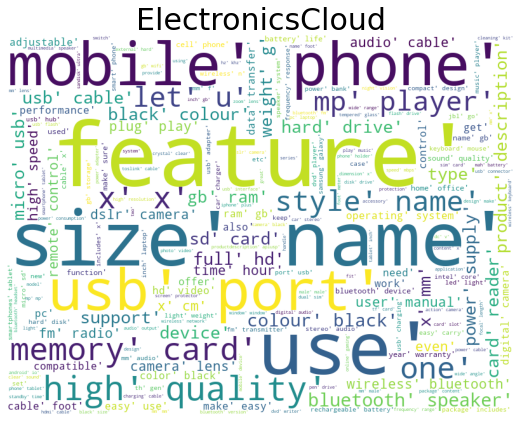

In [67]:
show_wordcloud(Label_Household, "ElectronicsCloud")

In [68]:
# Visualisation of Text in Household category using wordcloud

import wordcloud
def show_wordcloud(Label_Electronics, title):
    text = ' '.join(Label_Household['Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

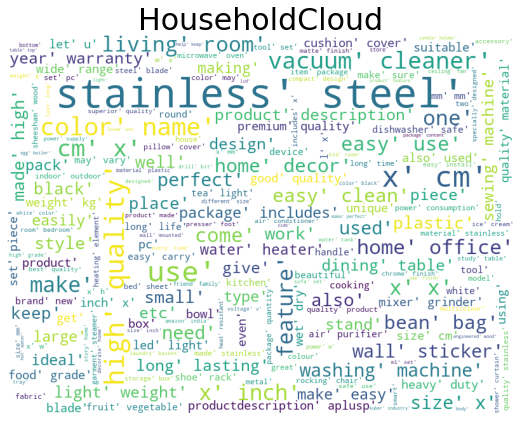

In [69]:
show_wordcloud(Label_Electronics, "HouseholdCloud")

In [70]:
# Visualisation of Text in Books category using wordcloud

import wordcloud
def show_wordcloud(Label_Books, title):
    text = ' '.join(Label_Books['Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

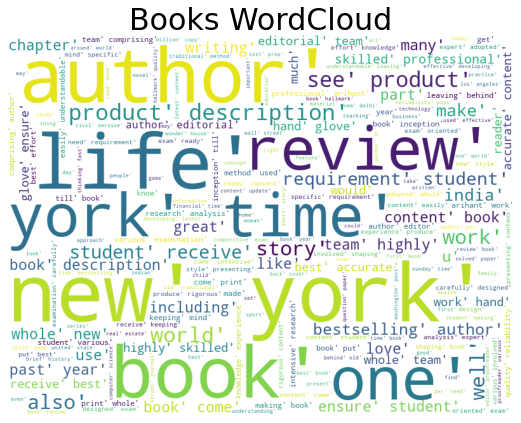

In [71]:
show_wordcloud(Label_Books, "Books WordCloud")

In [72]:
# To normalize the text back to string
df['Text'] = df.apply(lambda row: normalize(row['Text']), axis=1)

df.head()

,Label,Text
0,Household,styleys wrought iron coat rack hanger creative...
1,Household,cuisinart ccobkn deluxe electric opener black ...
2,Household,anchor penta amp way switch white pack anchor ...
3,Clothing & Accessories,proline men track jacket proline woven polyest...
4,Household,chef garage slot edge grip kitchen knife sharp...


In [73]:
# To build a bag of word using count vectorizer in sklearn

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# To create an instant of count vectorizer

count_vec = CountVectorizer(max_features= 250)

In [74]:
# To transform the text, the ouput will be a sparese matrix

text_features= count_vec.fit_transform(df['Text'])

In [75]:
text_features

<50423x250 sparse matrix of type '<class 'numpy.int64'>'
	with 743824 stored elements in Compressed Sparse Row format>

In [76]:
# To convert it to an array

text_features =text_features.toarray()

In [77]:
text_features

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
# To select features and the target

X = text_features
y = df['Label']

In [79]:
# To split the feature and the traget

from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [81]:
# Build model using random forest model

from sklearn.ensemble import RandomForestClassifier

# To create an instant
rfc = RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=0)

In [82]:
# To build the model

rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=0)

In [112]:
from sklearn.model_selection import cross_val_score

RandomForest_performance_CountVectorizer = np.mean(cross_val_score(rfc, x_train, y_train, cv=5))
RandomForest_performance_CountVectorizer

0.9460558907400397

In [84]:
# To transform the text, the ouput will be a sparese matrix

all_features = count_vec.get_feature_names()

top_features = ""
feat  = rfc.feature_importances_
features = np.argsort(feat)[::-1]

for word in features[:40]:
    top_features += all_features[word]
    top_features+= ", "

In [85]:
# To show the top 40 words

top_features

'author, woman, book, cotton, men, usb, home, wear, camera, gb, device, review, steel, boy, girl, black, kitchen, color, audio, plastic, phone, cable, stainless, white, fit, speaker, fabric, size, laptop, wireless, set, inch, lens, watt, university, use, compatible, mm, easy, video, '

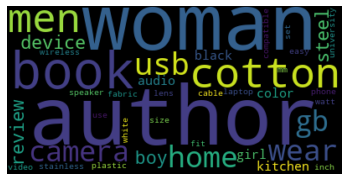

In [86]:
# To plot the wordcloud

wordcloud =WordCloud().generate(top_features)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=25, learning_rate=1, random_state=0)

In [88]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=25, random_state=0)

In [113]:
GradientBooting_performance_CountVectorizer = np.mean(cross_val_score(gbc, x_train, y_train, cv=5))
GradientBooting_performance_CountVectorizer

0.9005901522935795

In [90]:
# To transform the text, the ouput will be a sparese matrix

all_features1 = count_vec.get_feature_names()

top_features1 = ""
feat1  = gbc.feature_importances_
features1 = np.argsort(feat1)[::-1]

for word in features1[:40]:
    top_features1 += all_features[word]
    top_features1+= ", "

In [91]:
top_features1

'author, woman, usb, men, camera, home, steel, book, girl, audio, kitchen, boy, gb, device, plastic, black, watt, table, laptop, set, water, size, white, color, room, mm, wear, speaker, cable, phone, lens, wood, review, cotton, wireless, led, music, colour, safe, screen, '

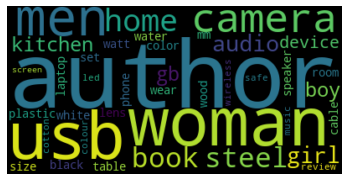

In [92]:
# To plot the wordcloud

wordcloud =WordCloud().generate(top_features1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [93]:
# Using TfidfVectorizer

TfidfVec = TfidfVectorizer(max_features=250)

In [94]:
# To transform the Text to vector forms

Tfidf_features = TfidfVec.fit_transform(df['Text'])

In [95]:
# To convert it to array

Tfidf_features = Tfidf_features.toarray()

In [96]:
# To check the vectors

Tfidf_features

array([[0.29325376, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [97]:
# To split the data to training and test data

train_features, test_features, train_labels, test_labels=train_test_split(Tfidf_features, y, test_size=0.2,
                                                                          stratify =y, random_state=0)

In [98]:
# To instantiate the classifier

rf = RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=0)

In [99]:
# To build the classififer

rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=0)

In [116]:
# To evaluete the model performance

RandomForest_performance_TfidfVectorizer = np.mean(cross_val_score(rf, train_features, train_labels, cv=5))
RandomForest_performance_TfidfVectorizer

0.9469731190914171

In [101]:
all_feat =TfidfVec.get_feature_names
all_feat

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(max_features=250)>

In [102]:
all_feat = TfidfVec.get_feature_names()

top_features2 = ""
feat2  = rf.feature_importances_
features2 = np.argsort(feat2)[::-1]

for word in features2[:40]:
    top_features2 += all_feat[word]
    top_features2+= ", "

In [103]:
# To check the top 40 words 

top_features2

'author, book, woman, men, cotton, usb, home, wear, camera, device, girl, steel, gb, boy, black, cable, color, fit, kitchen, review, set, plastic, stainless, size, fabric, laptop, audio, speaker, university, phone, white, wireless, lens, compatible, watt, easy, made, use, room, inch, '

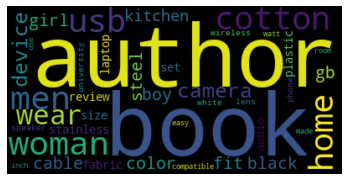

In [104]:
# To plot the wordcloud

wordcloud =WordCloud().generate(top_features2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [105]:
# To create an instant of the GBA 

gb = GradientBoostingClassifier(n_estimators=25, learning_rate=1, random_state=0)

In [106]:
gb.fit(train_features, train_labels)   # To build the model

GradientBoostingClassifier(learning_rate=1, n_estimators=25, random_state=0)

In [118]:
GradientBooting_performance_TfidfVectorizer = np.mean(cross_val_score(gb, train_features, train_labels, cv=5))
                                                       # To evaluate the performance
GradientBooting_performance_TfidfVectorizer

0.9071100308343503

In [108]:
all_feat =TfidfVec.get_feature_names
all_feat

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(max_features=250)>

In [109]:
all_feat = TfidfVec.get_feature_names()

top_features3 = ""
feat3  = gb.feature_importances_
features3 = np.argsort(feat3)[::-1]

for word in features3[:40]:
    top_features3 += all_feat[word]
    top_features3+= ", "

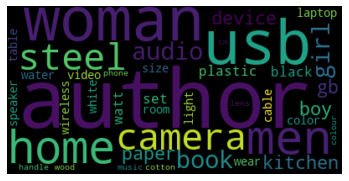

In [110]:
# To plot the wordcloud

wordcloud =WordCloud().generate(top_features3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

### Recommendation

- Random Forest Model, with an approximation of 95% cross validation score using both a bag of words and term frequency-inverse 
document frequency (TF-IDF) embedding methods, will be deployed since 95% of the time, Products will be correctly categorised 
into the right categories by the model.
This will give rise to a well-built product taxonomy which allows customers to find what they are looking for quickly and 
easily.